In [1]:
# Importação dos módulos
import random, string
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output

## Questão 2 - Problema da Mochila 0/1

In [2]:
# Valores do enunciado
pesos_Objetos =   [10, 18, 12, 14, 13, 11, 8, 6]
valores_Objetos = [ 5,  8,  7,  6,  9,  5, 4, 3]
capacidade_Mochila = 35
rho = max([valor/peso for valor,peso in zip(valores_Objetos,pesos_Objetos)])

In [3]:
class Individuo_Mochila(): # Representa uma possibilidade de pesos*valores na mochila
    def __init__(self,genotipo=None):
        if genotipo == None:
            self.genotipo = [random.randint(0, 1) for i in range(len(pesos_Objetos))]
        else:
            self.genotipo = genotipo
        self.score = self.GetAptidao()
      
    def GetAptidao(self):
        pesoTotal = np.dot(self.genotipo,pesos_Objetos)
        beneficioTotal = np.dot(self.genotipo,valores_Objetos)
        
        penalidade = 0
        if pesoTotal > capacidade_Mochila:
            penalidade = rho*(pesoTotal-capacidade_Mochila)
            
        aptidao = beneficioTotal - penalidade
        return aptidao
        
    def Mutate(self,mutationChance):
        genotipoPosMutacao = [] #Genotipo apos a mutacao
        for objeto_inserido in self.genotipo:
            randomico = random.random() # Pega um numero aleatorio entre 0 e 1 (float)
            if random.random() <= mutationChance: # Caso ocorra a mutacao  
                genotipoPosMutacao.append(abs(objeto_inserido - 1)) # BitFlip
            else:
                genotipoPosMutacao.append(objeto_inserido)
                
        self.genotipo = genotipoPosMutacao     
        self.GetAptidao() # Atualiza aptidao após mutação

In [4]:
class AlgoritmoGenetico_Mochila01():
    def __init__(self,populacao:int = 20):
        self.population = []
        self.bestPontuacaoList = []
        self.meanPontuacaoList = [] 
        for i in range (populacao):
            self.population.append(Individuo_Mochila())
            
    def ParentSelector(self): # Roulette-wheel selection
        probabilidades = [],[]# lista de 2 dimensoes contendo em [0] -> as probabilidades e [1] - > probab acumulada
        aptidaoTotal = sum([individuo.score for individuo in self.population])
        probabAcumulada = 0
        for individuo in self.population:
            probabilidades[0].append(individuo.score/aptidaoTotal)
            probabAcumulada += individuo.score/aptidaoTotal
            probabilidades[1].append(probabAcumulada)         
        parents = []
        for i in range(2): # Seleciona 2 pais
            roleta = random.random() # numero de 0 a 1
            for j,probabAcumulada in enumerate(probabilidades[1]):
                if(roleta < probabAcumulada): # se o numero da roleta for menor que o da prob, parar
                    parents.append(self.population[j])                       
                    break
        return parents   

            
    def CrossOver(self,parents,crossOverChance = 0.7): # Single Point Crossover
        if random.random() < crossOverChance:
            pai1Genotipo = parents[0].genotipo
            pai2Genotipo = parents[1].genotipo 
            pos = random.randrange(len(pai1Genotipo)) # single point crossover -> Pega a posicao para o corte
            filho1Genotipo = pai1Genotipo[:pos] + pai2Genotipo[pos:]
            filho2Genotipo = pai2Genotipo[:pos] + pai1Genotipo[pos:]  
            filho1 = Individuo_Mochila(filho1Genotipo)
            filho2 = Individuo_Mochila(filho2Genotipo)
        else: # Caso n ocorra o crossover, os filhos tem as mesmas caracteristicas dos pais
            filho1 = parents[0]
            filho2 = parents[1]
        return [filho1,filho2]
    
    
    def run(self,maxgen=2000,chanceCrossOver=0.8,chanceMutacao=0.03,geracoesIguais=5):
        ngen=0
        while ngen < maxgen: 
            ngen +=1
            
            # Algoritmo evolutivo
            novaPopulacao = []
            for i in range(int(len(self.population)/2)): # 
                parents = self.ParentSelector()
                filhos = self.CrossOver(parents,crossOverChance=chanceCrossOver)
                for filho in filhos:
                    filho.Mutate(mutationChance=chanceMutacao)
                    novaPopulacao.append(filho) # Adiciona o filho  (depois de muta-lo) à nova populacao   
            self.population = novaPopulacao
            bestPontuacao = max([individuo.score for individuo in self.population])
            
            # Avaliacao do Algoritmo
            self.bestPontuacaoList.append(bestPontuacao)
            clear_output(wait=True) # Limpa o console, para sobrescrever o print abaixo
            print("Geração Atual:{}/{}         MelhorPontuação:{}".format(ngen+1,maxgen,bestPontuacao))
            melhorGenotipoIndex = [individuo.score for individuo in self.population].index(bestPontuacao)
            print("Melhor Genotipo[{}]: {}".format(melhorGenotipoIndex,self.population[melhorGenotipoIndex].genotipo))
            #Condicao de Parada
            # Checa se as ultimas n geracoes sao iguais e para o algoritmo caso seja -> CONVERGIU
            if (len(self.bestPontuacaoList) > geracoesIguais) and (self.bestPontuacaoList[-geracoesIguais:].count(self.bestPontuacaoList[-1]) == geracoesIguais):
                print("Todas {} geracoes passadas tem o mesmo valor".format(geracoesIguais))
                break
        return [ngen,self.bestPontuacaoList]

In [7]:
ngens = []
for i in range(5):
    algoritmo_Mochila01 = AlgoritmoGenetico_Mochila01(200)
    [ngen, bestPontuacaoList_Mochila01] = algoritmo_Mochila01.run(maxgen=300,chanceCrossOver=0.7,chanceMutacao=0.05,geracoesIguais=25)
    ngens.append(ngen)

print("Média Geraçoes:{}".format(np.mean(ngens)))

Geração Atual:35/300         MelhorPontuação:21
Melhor Genotipo[96]: [1, 0, 1, 0, 1, 0, 0, 0]
Todas 25 geracoes passadas tem o mesmo valor
Média Geraçoes:63.0


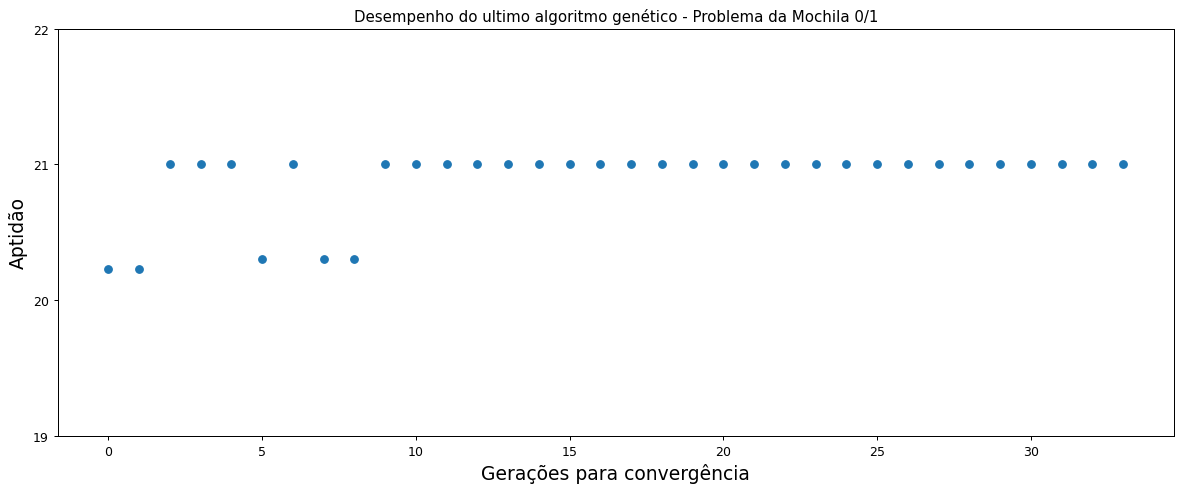

In [8]:
plt.figure(figsize=(16,6),dpi=90)
plt.scatter(range(len(bestPontuacaoList_Mochila01)),bestPontuacaoList_Mochila01)
plt.xlabel("Gerações para convergência",fontsize=15)
plt.ylabel("Aptidão",fontsize=15)
plt.title("Desempenho do ultimo algoritmo genético - Problema da Mochila 0/1")
plt.yticks(range(19,23,1))
plt.show()

### Observações
- A condição de término foi tirada do livro "Introduction to Evolutionary Computing" em que o algoritmo parava quando não houvesse melhorias na aptidao nas últimas 25 gerações


- Foi utilizado todos os métodos anunciados na questão e precisou-se de, em média, **63** gerações para o algoritmo chegar no resultado desejado.


- Observou-se que logo no começo do algoritmo, algumas populações ja obtiveram a pontuação ótima, de 21 pontos, dada pelo Genótipo [1,0,1,0,1,0,0,0]. Isto se deve à possibilidade significativa de gerar esse genótipo aleatoriamente, de 1 em 2^8, ou seja 0.39% de chance. 
    - A cada individuo, há uma possibilidade de 99.61% dele não possuir o genótipo ideal, com isso, em uma população de 200, existe uma chance de 45.77% de nenhum individuo possuir esse genótipo.
        - Portanto, em uma população de 200, há uma possibilidade de 54.23% do genótipo ideal ser gerado na primeira geração, como pode ser observado no código abaixo:

In [9]:
bestGenotipos = []
for i in range(10001):
    algoritmo_Mochila01_2 = AlgoritmoGenetico_Mochila01(200)
    melhorGenotipo = max([individuo.score for individuo in algoritmo_Mochila01_2.population])
    bestGenotipos.append(melhorGenotipo)
    if i % 1000 == 0: # Se for divisivel por 1000, para nao imprimir muitas vezes
        clear_output(wait=True) # Limpa o console, para sobrescrever o print abaixo 
        print("i Atual: {}".format(i))
        print("Média Atual: {}".format(bestGenotipos.count(21)/len(bestGenotipos)*100))

i Atual: 10000
Média Atual: 54.484551544845516


- Foi observado também que o algoritmo não convergia totalmente, isso se deve ao mecanismo geracional e ao operador de seleção proporcional ao fitness + Roleta. 
    - Como os descendentes foram gerados aleatoriamente a partir de pais com pesos diferentes, existia a possibilidade (ainda que pequena) de uma população inteira ser gerada e mutada e possuir uma aptidão pior que a da geração passada. 
    - Isso ocorre devido a perda da pressão na seleção, que é quando os valores de fitness são muito proximos. Quando isso acontece, a seleção tende a ter um caráter um pouco aleatório a partir de uma distribuição uniforme.
    - Uma possível solução para esse problema seria a utilização da seleção baseada em Ranking.